In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame()

data_dirs = {
        'data/science-challenge-master-data/negative': 'negative',
        'data/science-challenge-master-data/positive': 'positive',
        'data/science-challenge-master-data/neutral': 'neutral'
        }

label_decode_map = {'negative': 0, 
                    'neutral': 1,
                    'positive': 2}

for file, label in data_dirs.items():
    temp_df = pd.read_csv(file, sep='\t', names=['text'])
    if label in ['positive', 'neutral', 'negative']:
        temp_df['label'] = label
    df = pd.concat([df, temp_df])

def encode_sentiment(label):
    return label_decode_map[label]

df['target'] = df['label'].apply(lambda x: encode_sentiment(x))

df.head()

,text,label,target
0,@VirginAmerica it's really aggressive to blast...,negative,0
1,@VirginAmerica and it's a really big bad thing...,negative,0
2,@VirginAmerica seriously would pay $30 a fligh...,negative,0
3,@VirginAmerica SFO-PDX schedule is still MIA.,negative,0
4,@VirginAmerica I flew from NYC to SFO last we...,negative,0


In [6]:
print("Shape of the dataframe is",df.shape)
print("The number of nulls in each column are \n", df.isna().sum())

Shape of the dataframe is (14640, 3)
The number of nulls in each column are 
 text      0
label     0
target    0
dtype: int64


## Imbalanced Classes

Text(0.5, 1.0, 'Count of Type of Sentiment')

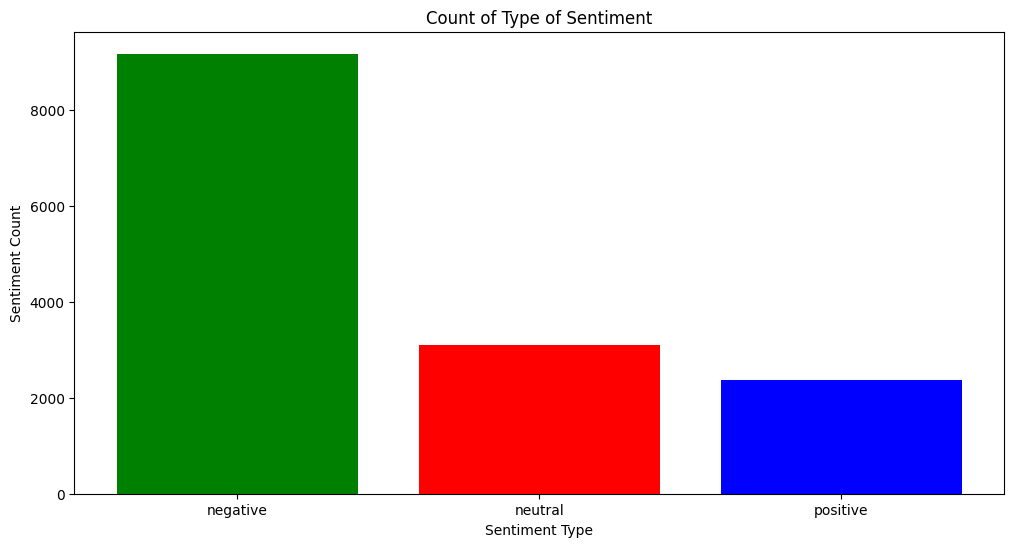

In [7]:
counter = df['label'].value_counts()
index = [1,2,3]
plt.figure(1,figsize=(12,6))
plt.bar(index,counter,color=['green','red','blue'])
plt.xticks(index,['negative','neutral','positive'],rotation=0)
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Count of Type of Sentiment')